In [1]:
import nltk

In [2]:
import re

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.probability import FreqDist

In [5]:
import matplotlib.pyplot as plt

ID do corpus

In [6]:
nltk_id = 'machado'


In [7]:
nltk.download(nltk_id)

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [8]:
print(nltk.corpus.machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [29]:
helena = nltk.corpus.machado.raw('romance/marm03.txt')

In [30]:
print(helena)

ROMANCE, Helena,1876

Helena

Texto-fonte:
Obra Completa, de Machado de Assis,
  vol. I,
Rio de Janeiro: Nova
  Aguilar, 1994.

Publicado originalmente
  em folhetins, a partir de 06/08/1876, em  O Globo.

ADVERTÊNCIA

Esta nova edição de Helena sai com várias emendas de linguagem e outras, que não alteram a
  feição do livro. Ele é o mesmo da data em que o compus e imprimi,
  diverso do que o tempo me foi depois, correspondendo assim ao capítulo da
  história do meu espírito, naquele ano de 1876.

Não me culpeis pelo que
  lhe achardes romanesco. Dos que então fiz, este me era particularmente prezado.
  Agora mesmo, que há tanto me fui a outras e diferentes páginas, ouço um eco
  remoto ao reler estas, eco de mocidade e fé ingênua. É claro que, em nenhum
  caso, lhes tiraria a feição passada; cada obra pertence ao seu tempo.

M. de A.

CAPÍTULO PRIMEIRO

O Conselheiro Vale
  morreu às 7 horas da noite de 25 de abril de 1859. Morreu de apoplexia
  fulminante, pouco depois de cochilar a

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [31]:
    helena_clean_text =  re.findall(r'\b[A-zÀ-úü]+\b', helena.lower())

In [32]:
print(helena_clean_text)

['romance', 'helena', 'helena', 'texto', 'fonte', 'obra', 'completa', 'de', 'machado', 'de', 'assis', 'vol', 'i', 'rio', 'de', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalmente', 'em', 'folhetins', 'a', 'partir', 'de', 'em', 'o', 'globo', 'advertência', 'esta', 'nova', 'edição', 'de', 'helena', 'sai', 'com', 'várias', 'emendas', 'de', 'linguagem', 'e', 'outras', 'que', 'não', 'alteram', 'a', 'feição', 'do', 'livro', 'ele', 'é', 'o', 'mesmo', 'da', 'data', 'em', 'que', 'o', 'compus', 'e', 'imprimi', 'diverso', 'do', 'que', 'o', 'tempo', 'me', 'foi', 'depois', 'correspondendo', 'assim', 'ao', 'capítulo', 'da', 'história', 'do', 'meu', 'espírito', 'naquele', 'ano', 'de', 'não', 'me', 'culpeis', 'pelo', 'que', 'lhe', 'achardes', 'romanesco', 'dos', 'que', 'então', 'fiz', 'este', 'me', 'era', 'particularmente', 'prezado', 'agora', 'mesmo', 'que', 'há', 'tanto', 'me', 'fui', 'a', 'outras', 'e', 'diferentes', 'páginas', 'ouço', 'um', 'eco', 'remoto', 'ao', 'reler', 'estas', 'eco', 'de

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [15]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [38]:
portuguese_stopwords = set(stopwords)

In [44]:
stemming_helena_text = [w for w in helena_clean_text if w not in portuguese_stopwords]

In [45]:
print(stemming_helena_text)

['romance', 'helena', 'helena', 'texto', 'fonte', 'obra', 'completa', 'machado', 'assis', 'vol', 'i', 'rio', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalmente', 'folhetins', 'partir', 'globo', 'advertência', 'nova', 'edição', 'helena', 'sai', 'várias', 'emendas', 'linguagem', 'outras', 'alteram', 'feição', 'livro', 'data', 'compus', 'imprimi', 'diverso', 'tempo', 'correspondendo', 'assim', 'capítulo', 'história', 'espírito', 'naquele', 'ano', 'culpeis', 'achardes', 'romanesco', 'então', 'fiz', 'particularmente', 'prezado', 'agora', 'tanto', 'outras', 'diferentes', 'páginas', 'ouço', 'eco', 'remoto', 'reler', 'eco', 'mocidade', 'fé', 'ingênua', 'claro', 'nenhum', 'caso', 'tiraria', 'feição', 'passada', 'cada', 'obra', 'pertence', 'tempo', 'm', 'capítulo', 'primeiro', 'conselheiro', 'vale', 'morreu', 'horas', 'noite', 'abril', 'morreu', 'apoplexia', 'fulminante', 'pouco', 'cochilar', 'sesta', 'segundo', 'costumava', 'dizer', 'preparava', 'ir', 'jogar', 'usual', 'partida', 'voltar

[texto do link](https://)Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [41]:
porter = nltk.PorterStemmer()

In [46]:
no_stemming_helena_text = [porter.stem(t) for t in stemming_helena_text]

In [43]:
print(no_stemming_helena_text)

['romanc', 'helena', 'helena', 'texto', 'font', 'obra', 'completa', 'machado', 'assi', 'vol', 'i', 'rio', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalment', 'folhetin', 'partir', 'globo', 'advertência', 'nova', 'edição', 'helena', 'sai', 'vária', 'emenda', 'linguagem', 'outra', 'alteram', 'feição', 'livro', 'data', 'compu', 'imprimi', 'diverso', 'tempo', 'correspondendo', 'assim', 'capítulo', 'história', 'espírito', 'naquel', 'ano', 'culpei', 'achard', 'romanesco', 'então', 'fiz', 'particularment', 'prezado', 'agora', 'tanto', 'outra', 'diferent', 'página', 'ouço', 'eco', 'remoto', 'reler', 'eco', 'mocidad', 'fé', 'ingênua', 'claro', 'nenhum', 'caso', 'tiraria', 'feição', 'passada', 'cada', 'obra', 'pertenc', 'tempo', 'm', 'capítulo', 'primeiro', 'conselheiro', 'vale', 'morreu', 'hora', 'noit', 'abril', 'morreu', 'apoplexia', 'fulminant', 'pouco', 'cochilar', 'sesta', 'segundo', 'costumava', 'dizer', 'preparava', 'ir', 'jogar', 'usual', 'partida', 'voltaret', 'casa', 'desembarg

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [47]:
freq_sem_stem = FreqDist(no_stemming_helena_text)
freq_com_stem = FreqDist(stemming_helena_text)

In [48]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(20))

20 palavras mais frequentes sem stem:
[('estácio', 518), ('helena', 498), ('diss', 219), ('d', 192), ('úrsula', 169), ('olho', 152), ('casa', 150), ('dia', 140), ('melchior', 134), ('moça', 132), ('padr', 128), ('alguma', 128), ('mão', 125), ('todo', 122), ('coisa', 121), ('coração', 116), ('tempo', 114), ('la', 110), ('palavra', 109), ('mendonça', 106)]


In [49]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(20))

20 palavras mais frequentes com stem:
[('estácio', 518), ('helena', 498), ('disse', 219), ('d', 192), ('úrsula', 169), ('olhos', 152), ('casa', 147), ('melchior', 134), ('moça', 128), ('padre', 127), ('coração', 116), ('tempo', 113), ('mendonça', 106), ('la', 102), ('camargo', 99), ('ainda', 99), ('eugênia', 97), ('família', 95), ('pai', 92), ('lo', 90)]


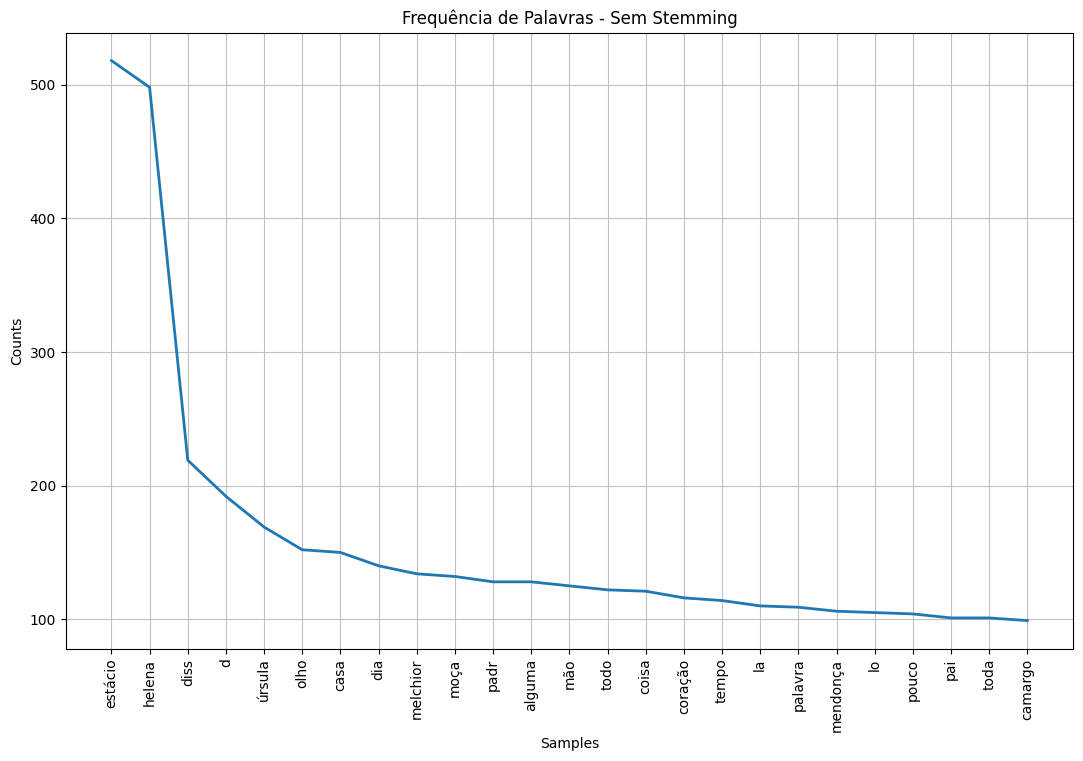

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [50]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

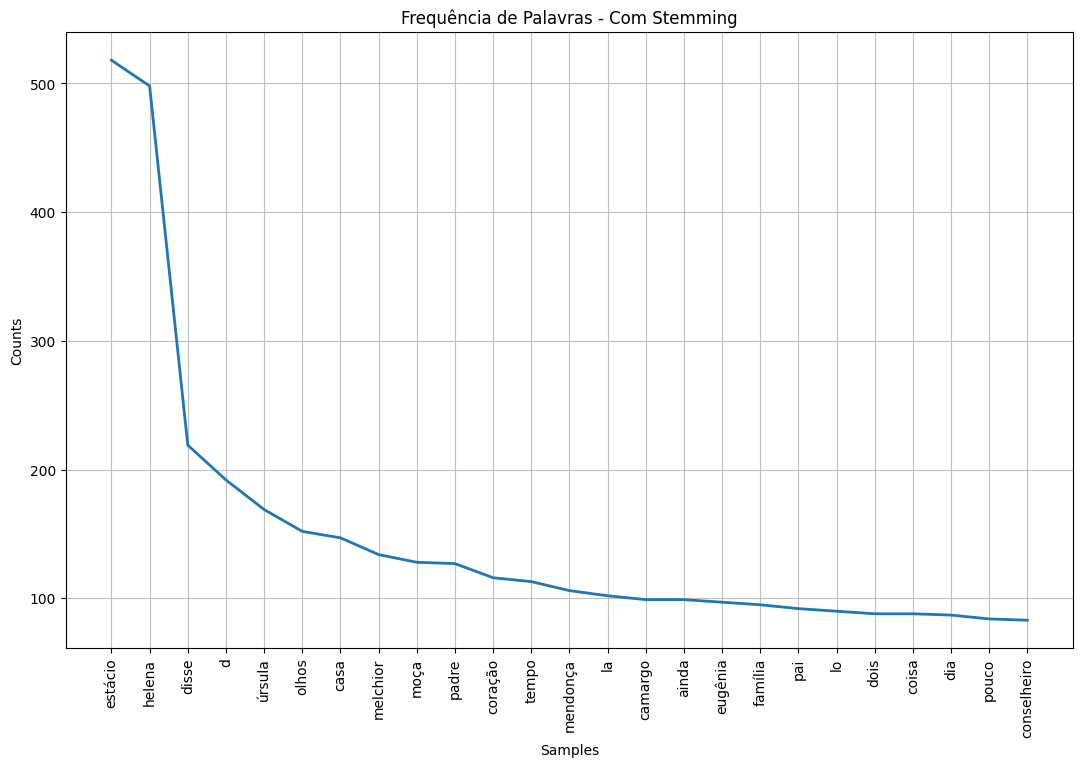

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [51]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")